In [1]:
import xarray as xr
from mom6 import DATA_PATH
from mom6.mom6_module import mom6_io

In [2]:
class_static = mom6_io.MOM6Static
ds_rotate = class_static.get_rotate(data_relative_dir='static/')

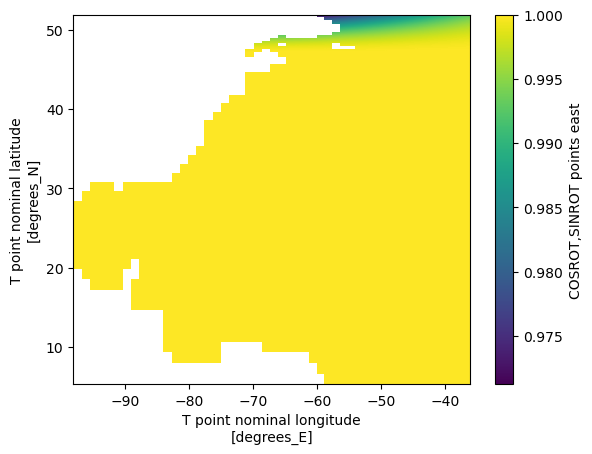

In [3]:
ds_rotate.cosrot.plot()

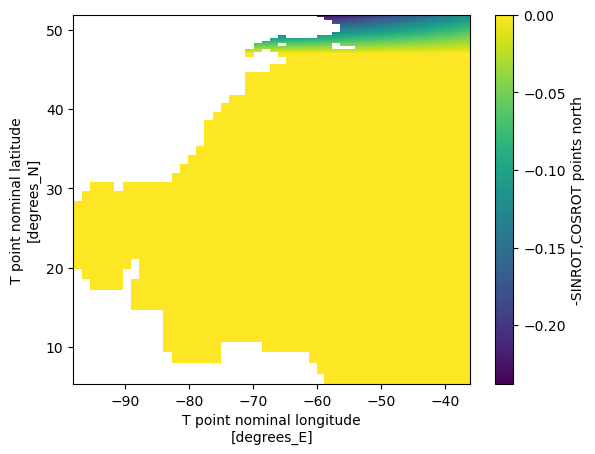

In [4]:
ds_rotate.sinrot.plot()

In [5]:
class_hist_ssu = mom6_io.MOM6Historical(
    var='ssu',data_relative_dir='hist_run/',static_relative_dir='static/',grid='raw',source='local')
ds_u = class_hist_ssu.get_single()
class_hist_ssv = mom6_io.MOM6Historical(
    var='ssv',data_relative_dir='hist_run/',static_relative_dir='static/',grid='raw',source='local')
ds_v = class_hist_ssv.get_single()


In [8]:
da_u = ds_u.ssu.load()

In [12]:
ds_u

<xarray.Dataset> Size: 68MB
Dimensions:       (xh: 775, yh: 845, xq: 776, yq: 846, nv: 2)
Coordinates: (12/14)
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    time          datetime64[ns] 8B 1993-01-01T12:00:00
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
    geolon        (yh, xh) float32 3MB ...
    ...            ...
    geolat_c      (yq, xq) float32 3MB ...
    geolon_u      (yh, xq) float32 3MB -98.04 -97.96 -97.88 ... -37.23 -37.15
    geolat_u      (yh, xq) float32 3MB 5.273 5.273 5.273 ... 58.15 58.16 58.16
    geolon_v      (yq, xh) float32 3MB ...
    geolat_v      (yq, xh) float32 3MB ...
  * nv            (nv) float64 16B 1.0 2.0
Data variables: (12/22)
    areacello     (yh, xh) float32 3MB ...
    deptho        (yh, xh) float32 3MB ...
    sftof         (yh, xh) float32 3MB ...
    Coriolis      (yq, xq) float32 3MB ...
    wet           (yh, xh) float32 3MB ...
    wet_c         (yq, xq) float32 3MB ...
    ...            ...
    areacello_bu  (yq, xq) float32 3MB ...
    average_DT    timedelta64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    average_T1    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    average_T2    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    ssu           (yh, xq) float32 3MB nan nan nan nan ... 0.1278 0.1395 0.06557
    time_bnds     (nv) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          NWA12_MOM6_v1.0
    grid_type:      regular
    grid_tile:      N/A

In [9]:
da_v = ds_v.ssv.load()

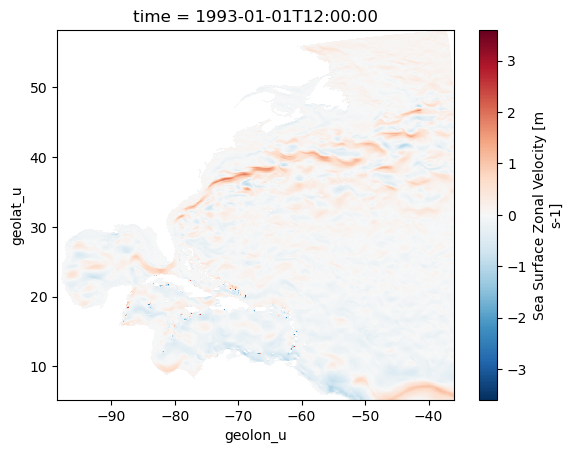

In [53]:
da_u.plot(x='geolon_u',y='geolat_u')

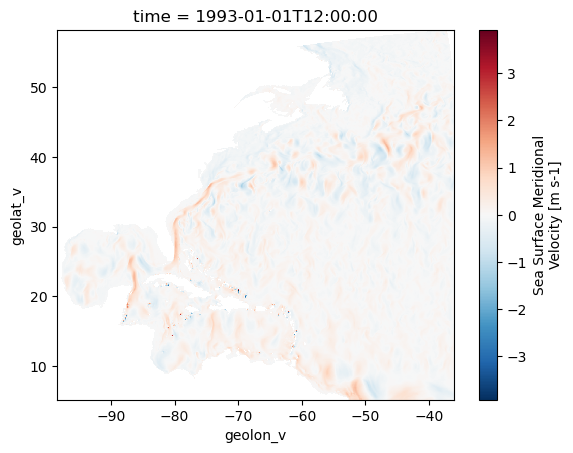

In [54]:
da_v.plot(x='geolon_v',y='geolat_v')

In [22]:
import xesmf as xe
from dask.distributed import Client

In [ ]:
ds_u = ds_u.rename({'geolon_u':'lon','geolat_u':'lat'})
ds_v = ds_v.rename({'geolon_v':'lon','geolat_v':'lat'})

In [17]:
ds_rotate = ds_rotate.rename({'geolon':'lon','geolat':'lat'})

In [23]:
regridder_u2t = xe.Regridder(ds_u, ds_rotate, "bilinear", unmapped_to_nan=True)
regridder_v2t = xe.Regridder(ds_v, ds_rotate, "bilinear", unmapped_to_nan=True)

In [24]:
da_u_regrid = regridder_u2t(da_u)
da_v_regrid = regridder_v2t(da_v)

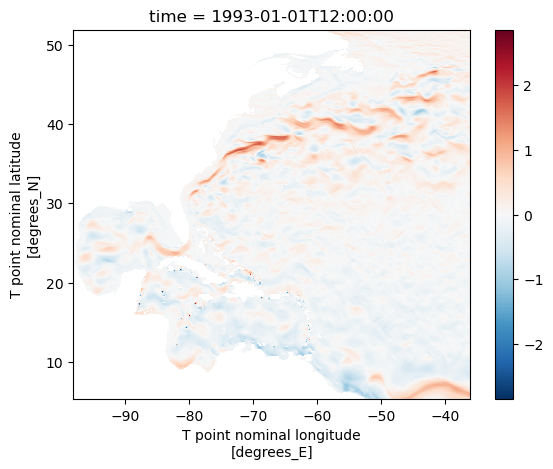

In [25]:
da_u_regrid.plot()

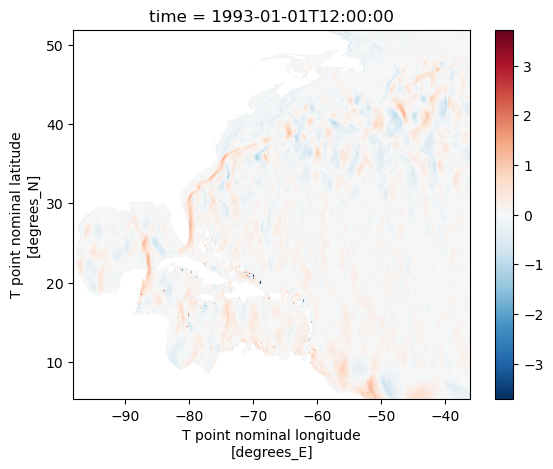

In [26]:
da_v_regrid.plot()

In [29]:
da_u_true = da_u_regrid*ds_rotate['cosrot']+da_v_regrid*ds_rotate['sinrot']
da_v_true = -da_u_regrid*ds_rotate['sinrot']+da_v_regrid*ds_rotate['cosrot']

In [47]:
da_u_true['lon']=ds_u.geolon
da_u_true['lat']=ds_u.geolat
da_v_true['lon']=ds_v.geolon
da_v_true['lat']=ds_v.geolat

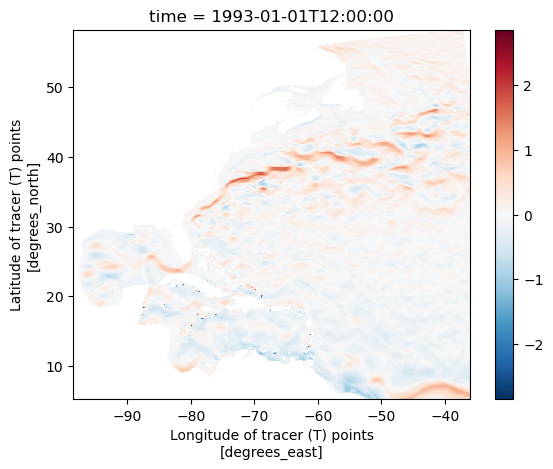

In [59]:
da_u_true.plot(x='geolon',y='geolat')

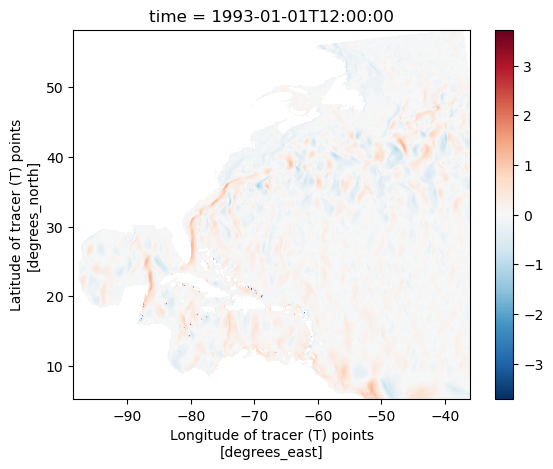

In [58]:
da_v_true.plot(x='geolon',y='geolat')

In [60]:
ds_u

<xarray.Dataset> Size: 68MB
Dimensions:       (xh: 775, yh: 845, xq: 776, yq: 846, nv: 2)
Coordinates: (12/14)
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    time          datetime64[ns] 8B 1993-01-01T12:00:00
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
    geolon        (yh, xh) float32 3MB ...
    ...            ...
    geolat_c      (yq, xq) float32 3MB ...
    lon           (yh, xq) float32 3MB -98.04 -97.96 -97.88 ... -37.23 -37.15
    lat           (yh, xq) float32 3MB 5.273 5.273 5.273 ... 58.15 58.16 58.16
    geolon_v      (yq, xh) float32 3MB ...
    geolat_v      (yq, xh) float32 3MB ...
  * nv            (nv) float64 16B 1.0 2.0
Data variables: (12/22)
    areacello     (yh, xh) float32 3MB ...
    deptho        (yh, xh) float32 3MB ...
    sftof         (yh, xh) float32 3MB ...
    Coriolis      (yq, xq) float32 3MB ...
    wet           (yh, xh) float32 3MB ...
    wet_c         (yq, xq) float32 3MB ...
    ...            ...
    areacello_bu  (yq, xq) float32 3MB ...
    average_DT    timedelta64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    average_T1    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    average_T2    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    ssu           (yh, xq) float32 3MB nan nan nan nan ... 0.1278 0.1395 0.06557
    time_bnds     (nv) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          NWA12_MOM6_v1.0
    grid_type:      regular
    grid_tile:      N/A

# testing

In [7]:
from mom6.mom6_module.mom6_vector_rotate import VectorRotation
class_rotate = VectorRotation(ds_u,'ssu',ds_v,'ssv',ds_rotate)

In [8]:
dict_uv = class_rotate.generate_true_uv()

In [13]:
da_u_true_test = dict_uv['u'].drop_vars(['geolon','geolat']).compute()

In [14]:
da_v_true_test = dict_uv['v'].drop_vars(['geolon','geolat']).compute()

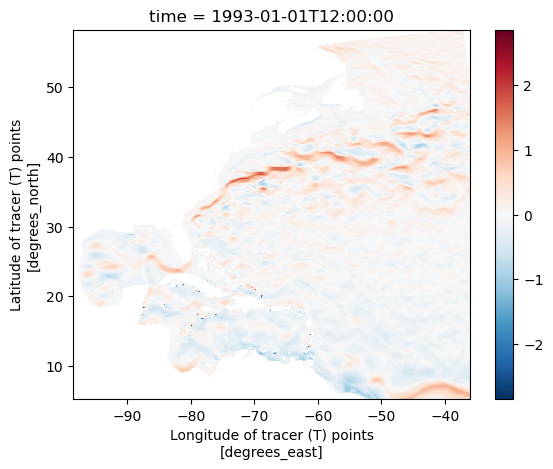

In [17]:
da_u_true_test.plot(x='lon',y='lat')

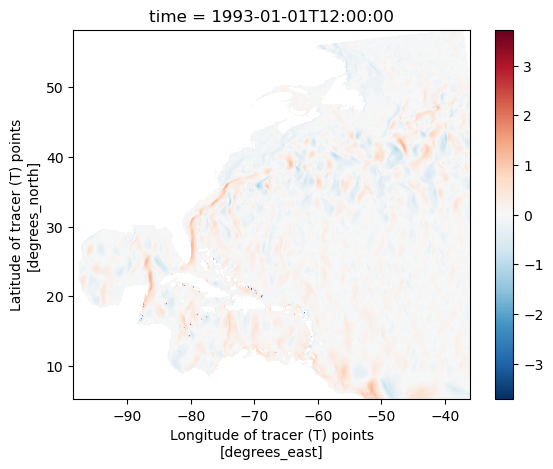

In [18]:
da_v_true_test.plot(x='lon',y='lat')